In [1]:
import pandas as pd


In [2]:
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')

In [4]:
treino.shape

(1460, 81)

In [5]:
treino.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
# Seleção de colunas númericas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [8]:
treino = treino.loc[:, cols_nr]
treino.shape

(1460, 38)

In [10]:
teste = teste.loc[:, cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 37)

Criação o modelo

In [11]:
X = treino.drop('SalePrice', axis=1)
y = treino.SalePrice

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Seleção dos Algoritmos

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg_rl = LinearRegression().fit(X_train, y_train)

In [16]:
y_pred_rl = reg_rl.predict(X_test)

In [17]:
from sklearn import tree

In [18]:
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)
y_pred_ad = reg_ad.predict(X_test)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
y_pred_knn = reg_knn.predict(X_test)

Avaliação dos modelos utilizando o erro absoluto e o erro quadrático

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
# Regressão Linear
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23908.41241228964
1546018499.3696015


In [25]:
# Árvore de Decisão
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

26848.412863070538
2044819113.8651452


In [24]:
# KNN
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33247.14937759336
2732965076.467842


Visualização da relação do y_test com as previsões

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'KNN')

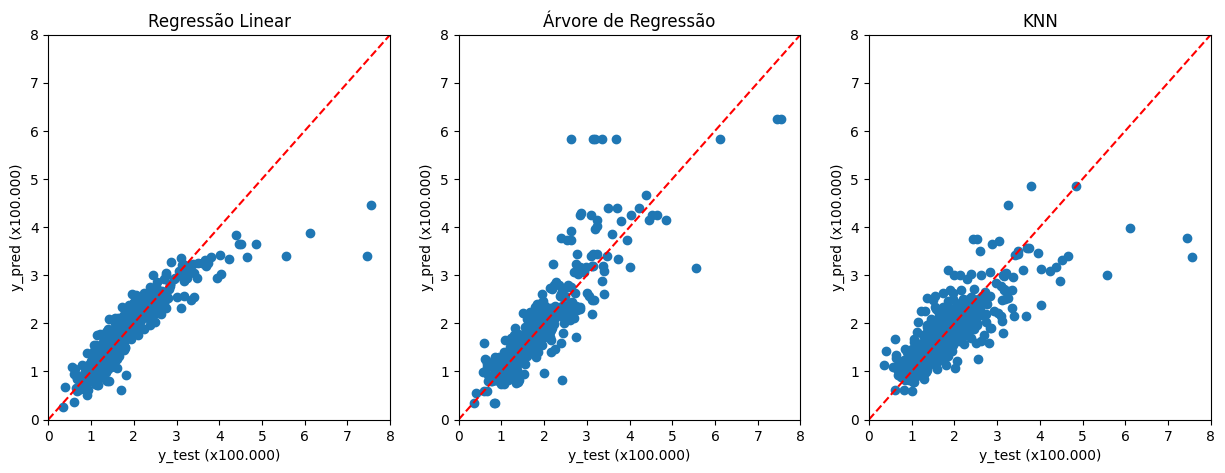

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8], '--r')

ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')

ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')

ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')

ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')


Escolha da Regressão Linear por apresentar menor Erro Quadrático, métrica avaliada pelo Kaggle na competição. 

In [32]:
teste.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [33]:
y_pred = reg_rl.predict(teste)

In [34]:
teste['SalePrice'] = y_pred

In [35]:
base_kaggle = teste[['Id', 'SalePrice']]
base_kaggle.head()

,Id,SalePrice
0,1461,121257.501624
1,1462,133303.929920
2,1463,169238.649242
3,1464,197338.270801
4,1465,197482.463776


In [36]:
base_kaggle.shape

(1459, 2)

In [37]:
base_kaggle.to_csv('resultado2.csv', index=False)